# Individual Assignment 2: Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)
library(cowplot)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




### About the Dataset

The link to the dataset is: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries <br>
The link to the raw dataset(web extractable) and all milestone files: https://github.com/Jaskaran1116/STAT-301-Project <br>
The dataset comprises 607 observations related to Data Science positions, encompassing various details about salaries as outlined below. 


Columns and their descriptions are listed below:
-  __work_year:__  The year the salary was paid.<br>
-  __experince_level:__  The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director. <br>
-  __employment_type:__  The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance <br> 
-  __job_title:__  The role worked in during the year. <br>
-  __salary:__  The total gross salary amount paid.<br>
-  __salary_currency:__  The currency of the salary paid as an ISO 4217 currency code.<br>
-  __salary_in_usd:__  The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).<br>
-  __employee_residence:__  Employee's primary country of residence in during the work year as an ISO 3166 country code.<br>
-  __remote_ratio:__  The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%).<br>
-  __company_location:__  The country of the employer's main office or contracting branch as an ISO 3166 country code.<br>
-  __company_size:__  The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large).

### Predictive Question

##### The predictive question that I am trying to answer is:
<br>
    
- __How does experience level, job title, work_year, remote work ratio, and company size affect the salary of an employee__
    - <u> Explanatory variables</u>: experience_level, job_title, work_year, remote_ratio, company_size
    - <u> Response variable</u>: salary_in_usd

<br>

### Reading the dataset from the web

In [2]:
url <- "https://raw.githubusercontent.com/Jaskaran1116/STAT-301-Project/main/data/ds_salaries.csv"

salary_data <- read_csv(url, show_col_types = FALSE)

head(salary_data)

New names:
• `` -> `...1`


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


- For the above dataset, we can see some inconsistencies. For instance, the first column has the column name as ...1 which is hard to interpret for an external viewer. Based on the output, it seems that it is just indexing each tuple in the dataset. We do not really need this and can drop this column since R by default gives us an index. We can reduce the complexity of our dataset before we move to the Exploratory Data Analysis.

- Furthermore, one of key objective for this project is to predcit the salaries (salary_in_usd) of a person based on various input factors such as job title, company location, etc. In our dataset, the attributes salary and salary_currency do not make sense since we do not have an exchange rate to compare the salary_in_usd and the salary based on a currency type. We can also drop salary and salary_currency attributes and reduce the complextiy of our dataset

- Before we move to cleaning and wrangling our dataset, let's look at some preliminary simple plots to dive more into the dataset

### Simple Preliminary Plots

- With a growing demand of Data Science, various industries like technology, finance, and healthcare are looking for professionals with excellent data science skillset, and job titles often reflect the level of responsibility, the scope of work, and the skillset required for the role. Higher level titles  such as 'Lead' or 'Principal' typically imply seniority, greater responsibility, and more advanced skill sets, which are usually compensated with higher salaries.

- Furthermore, experience level often mirrors an individual's professional development and accumulation of skills. With more experience, employees tend to develop a deeper understanding of their domain, enhance their problem-solving abilities, and possibly acquire leadership capabilities. Entry level employees have lesser salaries as compared to the employees who are on the executive level.

- Hence, exploring the average salaries(in USD) based on job title and experience level can provide us with better insights to the data. Hence I am producing two different bar plots showing average salaries by job title and average salaries by experience level respectively. 

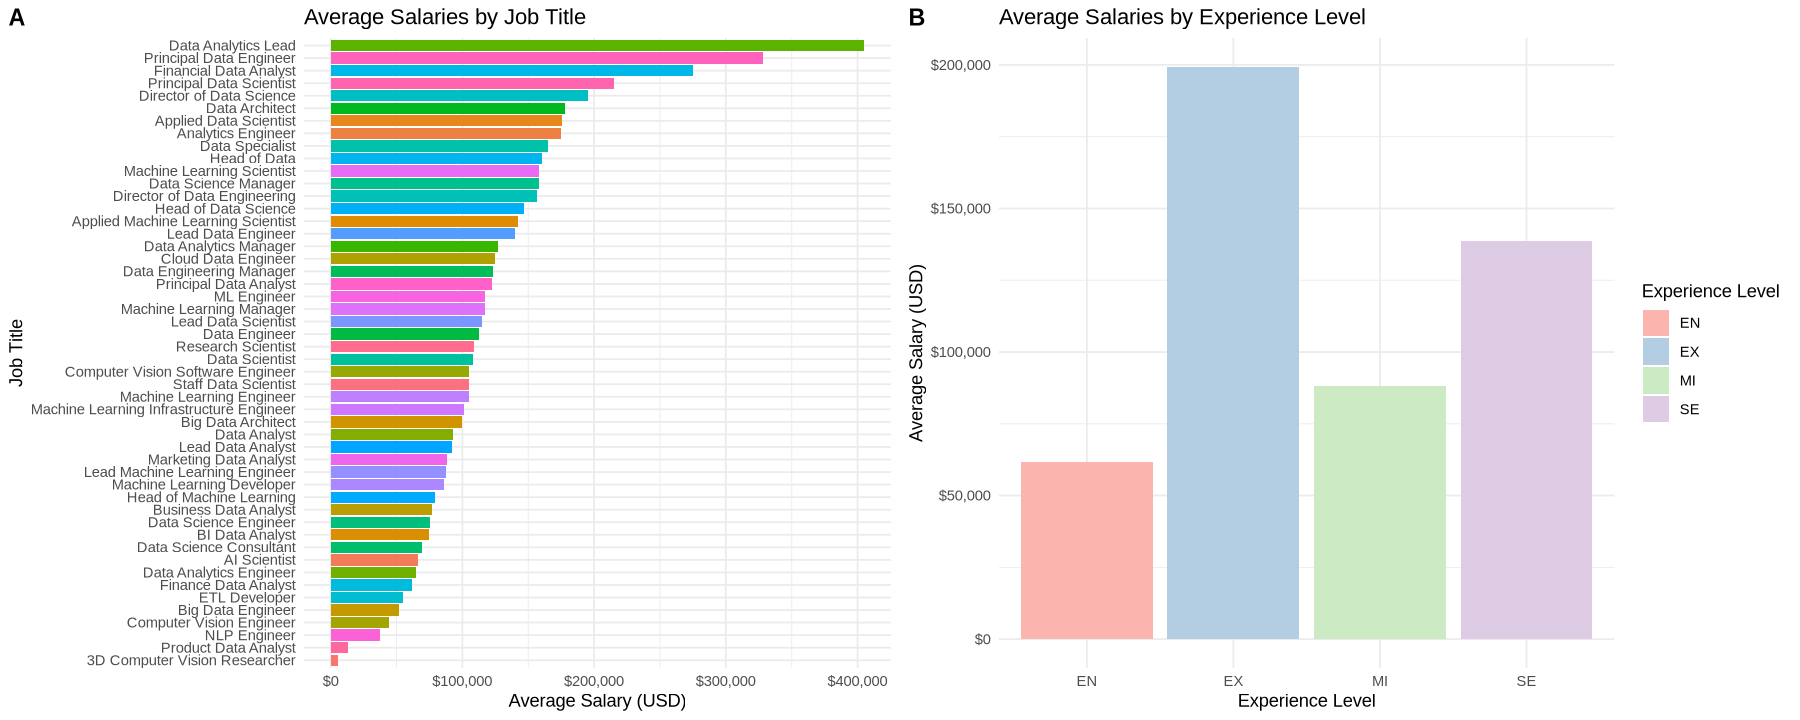

In [3]:
options(repr.plot.width = 15, repr.plot.height = 6) 

mean_salary_per_job_title <- salary_data %>%
  group_by(job_title) %>%
  summarise(avg_salary = mean(salary_in_usd)) %>%
  ggplot(aes(x = reorder(job_title, avg_salary), y = avg_salary, fill = job_title)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Average Salaries by Job Title",
       x = "Job Title",
       y = "Average Salary (USD)") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_y_continuous(labels = scales::dollar_format()) 



average_salary <- salary_data %>%
  group_by(experience_level) %>%
  summarise(avg_salary = mean(salary_in_usd))

mean_salaries_by_company_size <- ggplot(average_salary, aes(x = experience_level, y = avg_salary, fill = experience_level)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Salaries by Experience Level",
       x = "Experience Level",
       y = "Average Salary (USD)",
       fill = "Experience Level") +
  theme_minimal() +
  scale_y_continuous(labels = scales::dollar_format()) +
  scale_fill_brewer(palette = "Pastel1")  



plot_grid(mean_salary_per_job_title, mean_salaries_by_company_size, labels = "AUTO", ncol = 2)


- Based on the plots above, we can see that a Data Analytics lead has the highest average salary while a 3D Computer Vision Researcher has the lowest average salary. 
- We can also see that an employee at an executive position on average earns significantly higher salaries than an entry level employee which makes sense since it is true in the real corporate scenario

### Cleaning and Wrangling the dataset

- As mentioned above, the dataset contains some inconsistencies. For instance, the first column has the column name as ...1 which is hard to interpret for an external viewer. Based on the output, it seems that it is just indexing each tuple in the dataset. We do not really need this and can drop this column since R by default gives us an index. We can reduce the complexity of our dataset before we move to the Exploratory Data Analysis.

- Hence I would be tidying up the dataset before I proceed with the EDA and producing high quality visualizations

In [4]:
#dropping the unknown column
salary_data <- salary_data %>% select(-`...1`, -salary, -salary_currency)

head(salary_data)

work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2020,MI,FT,Data Scientist,79833,DE,0,DE,L
2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
2020,EN,FT,Data Analyst,72000,US,100,US,L


- Based on the output, we can see that the column header names are appropriate. We can now check if there are any null values in the dataset and can also check the central tendency measures of the numeric columns in the dataset to get better insights in the dataset

### Exploratory Data Analysis


I am now conducting an EDA for the dataset, wherein I would be checking the following: 
- The structure of the data
- If there exists any null values in the dataset
- Counting the unique values in the dataset and also checking if there is duplication within the dataset
- If there is duplication, we would remove the duplicated values to reduce the complexity of the dataset
- We would create a central tendency measures table for the numeric column to check the mean, median, and standard deviation of these attributes

In [5]:
# Checking the structure and summary of the dataset
summary(salary_data)

   work_year    experience_level   employment_type     job_title        
 Min.   :2020   Length:607         Length:607         Length:607        
 1st Qu.:2021   Class :character   Class :character   Class :character  
 Median :2022   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2021                                                           
 3rd Qu.:2022                                                           
 Max.   :2022                                                           
 salary_in_usd    employee_residence  remote_ratio    company_location  
 Min.   :  2859   Length:607         Min.   :  0.00   Length:607        
 1st Qu.: 62726   Class :character   1st Qu.: 50.00   Class :character  
 Median :101570   Mode  :character   Median :100.00   Mode  :character  
 Mean   :112298                      Mean   : 70.92                     
 3rd Qu.:150000                      3rd Qu.:100.00                     
 Max.   :600000                      Max.   :100.00

In [6]:
# Counting missing values in each column
summarise_all(salary_data, ~ sum(is.na(.)))

work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


- Luckily, there are no missing values within our dataset. This would make our exploratory data analysis easier 

In [7]:
# Counting unique values in each column
salary_data %>% summarise_all(n_distinct)

# Counting duplicated rows
duplicates <- sum(duplicated(salary_data))
print(paste("The number of duplicate rows in the data is", duplicates))

work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,4,4,50,369,57,3,50,3


[1] "The number of duplicate rows in the data is 42"


- We can see that there exists duplicate values in our data increasing the redundancy in the data. We can drop these duplicate values to make our dataset less complicated

In [8]:
# Dropping duplicate values
salary_data <- salary_data %>% distinct()
check_duplicates <- sum(duplicated(salary_data))
print(paste("The number of duplicate rows in the data is", check_duplicates))

[1] "The number of duplicate rows in the data is 0"


- We can now see that there are no duplicates in the dataset.
- I will now be looking at the central tendency measure table for the numeric columns in the dataset. However, having central tendency measure for the work_year attribute seems redundant and it would not be of much help for our EDA. Let's ignore this attribute for our central tendency measure table

In [9]:
central_measures <- salary_data %>%
  summarise(across(.cols = -work_year & where(is.numeric), 
            .fns = list(mean = ~mean(., na.rm = TRUE), 
                        median = ~median(., na.rm = TRUE), 
                        sd = ~sd(., na.rm = TRUE)),
            .names = "{.col}_{.fn}"))

central_measures

salary_in_usd_mean,salary_in_usd_median,salary_in_usd_sd,remote_ratio_mean,remote_ratio_median,remote_ratio_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
110610.3,1e+05,72280.7,69.9115,100,40.90067


- We get some interesting insights from the above table. We can see that the average salary across the dataset is 110,610 USD suggesting relatively higher salaries in the field of Data Science. This makes sense because Data Science has been growing in popularity since the last few years and the demand for such jobs is rising on the daily. This leads to better incentives such as higher salaries. Furthermore, we can see that average remote_ratio across the dataset is 69.911 suggesting that most people partially do remote work

### High quality Visualizations

- Now, I would be producing some high quality visualizations to deep dive into the dataset and derive meaningful insights from the data that can be beneficial in answering our predictive question

<br>

#### 1A. Trend of salaries over the years
#### 1B. Trend of salaries over the years for each company size

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


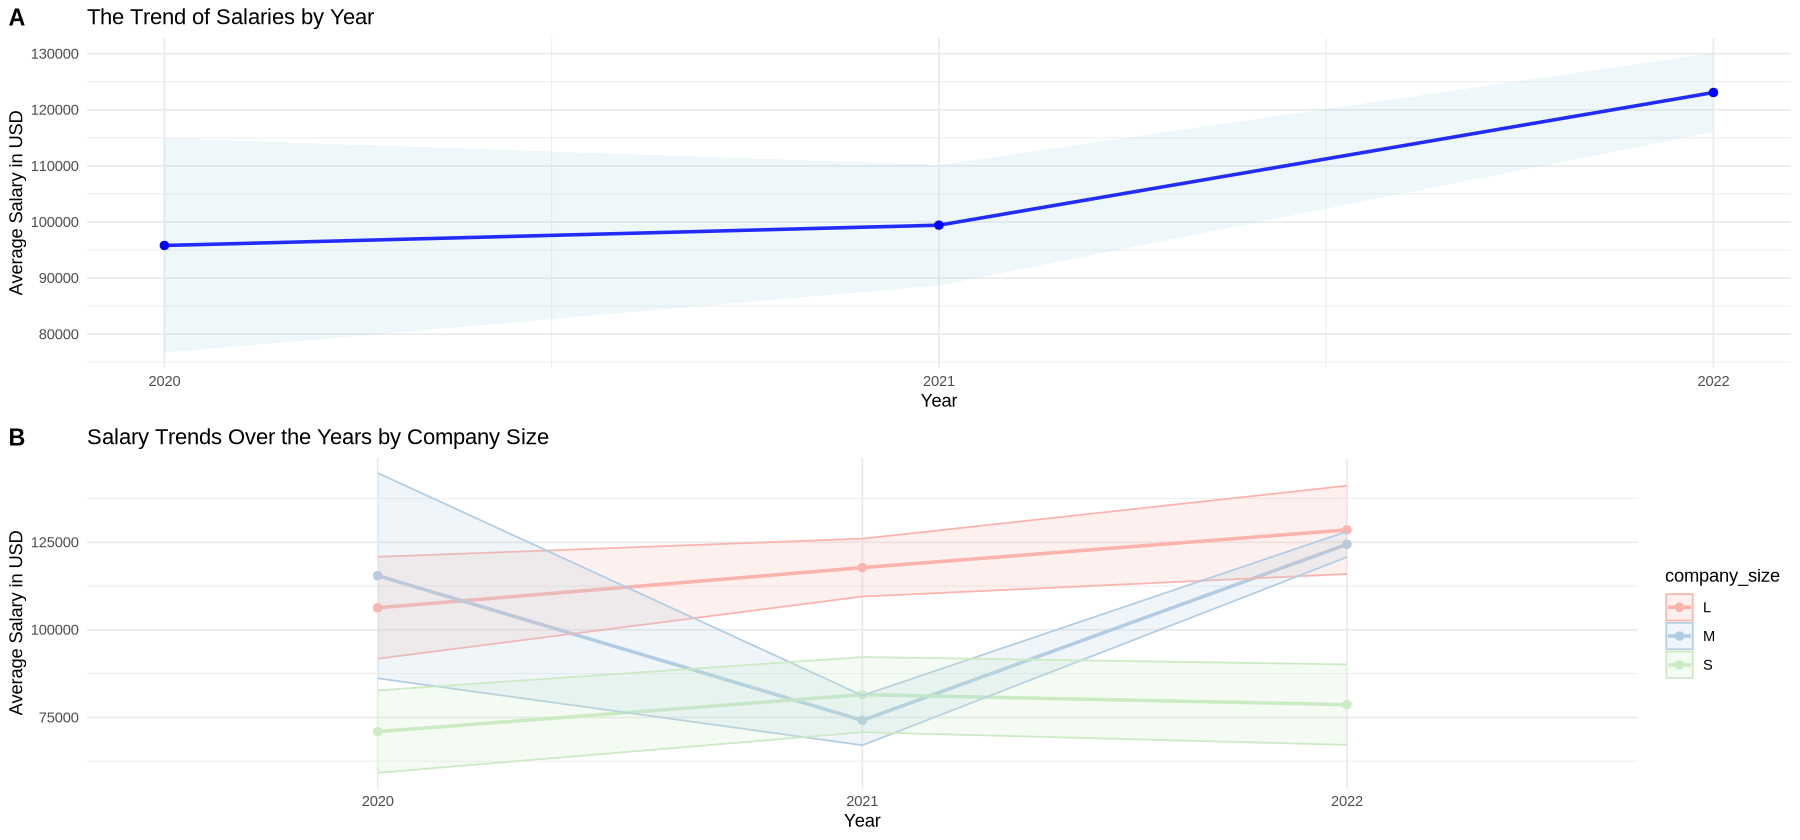

In [10]:
options(repr.plot.width = 15, repr.plot.height = 7) 

trend_data <- salary_data %>%
  group_by(work_year) %>%
  summarise(mean_salary = mean(salary_in_usd, na.rm = TRUE),
            sd_salary = sd(salary_in_usd, na.rm = TRUE),
            se_salary = sd_salary / sqrt(n())) %>%
  mutate(lower_ci = mean_salary - se_salary * 1.96,  # 95% CI
         upper_ci = mean_salary + se_salary * 1.96)

trend_data$work_year <- as.integer(trend_data$work_year)

trend_data_by_company_size <- salary_data %>%
  group_by(work_year, company_size) %>%
  summarise(mean_salary = mean(salary_in_usd, na.rm = TRUE),
            lower_ci = mean_salary - (sd(salary_in_usd, na.rm = TRUE)/sqrt(n())),
            upper_ci = mean_salary + (sd(salary_in_usd, na.rm = TRUE)/sqrt(n())),
            .groups = 'drop')


trend_plot <- ggplot(trend_data, aes(x = work_year, y = mean_salary)) +
  geom_line(size = 1, color = "blue") +
  geom_ribbon(aes(ymin = lower_ci, ymax = upper_ci), fill = "lightblue", alpha = 0.2) +
  geom_point(size = 2, color = "blue") +
  labs(title = "The Trend of Salaries by Year",
       x = "Year",
       y = "Average Salary in USD") +
  theme_minimal() +
  scale_x_continuous(breaks = unique(trend_data$work_year))

trend_by_compnay_size <- ggplot(trend_data_by_company_size, aes(x = as.factor(work_year), y = mean_salary, color = company_size, group = company_size)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  geom_ribbon(aes(ymin = lower_ci, ymax = upper_ci, fill = company_size), alpha = 0.2) +
  theme_minimal() +
  labs(title = "Salary Trends Over the Years by Company Size",
       x = "Year",
       y = "Average Salary in USD") +
  scale_color_brewer(palette = "Pastel1") +
  scale_fill_brewer(palette = "Pastel1") +
  scale_x_discrete(breaks = unique(trend_data_by_company_size$work_year))


plot_grid(trend_plot, trend_by_compnay_size, labels = "AUTO", ncol = 1)

- Based on the plots, we can derive some interesting insights:

    - Plot A shows the trend of salaries over the years. We can see a clear upward trend in salaries from 2020 to 2022. This could be indicative of a growing  recognition of the value of data science roles and skills in the industry. The consistent growth over the years suggests that the field of data science might be experiencing a steady increase in demand, possibly due to the adoption of data-driven decision-making across various sectors. The increase might also reflect broader economic trends, such as inflation or a general increase in technology sector salaries due to competitiveness in the field.
    
    - However, even though we see a consistent rise in the salaries overall, it is interesting to note that medium sized companies had a significant decline in the salaries from 2020 to 2021. This may be due to the pandemic that started in 2020. Several companies started facing losses and were unable to meet their annual target budgets due to a sudden decline in the economy during the pandemic. This resulted in lower than usual pay for employees working in the field of Data Science within a medium sized company. Large companies did not seem to get affected by this and offered higher salaries over time, while small companies almost stayed conistent due to smaller workforce in the company and a relatively easier budget to handle

#### 2A. A box-plot representing the salary distribution by experience level and company size

#### 2B. A stacked bar chart representing the normalized average salaries by experience level and remote ratio

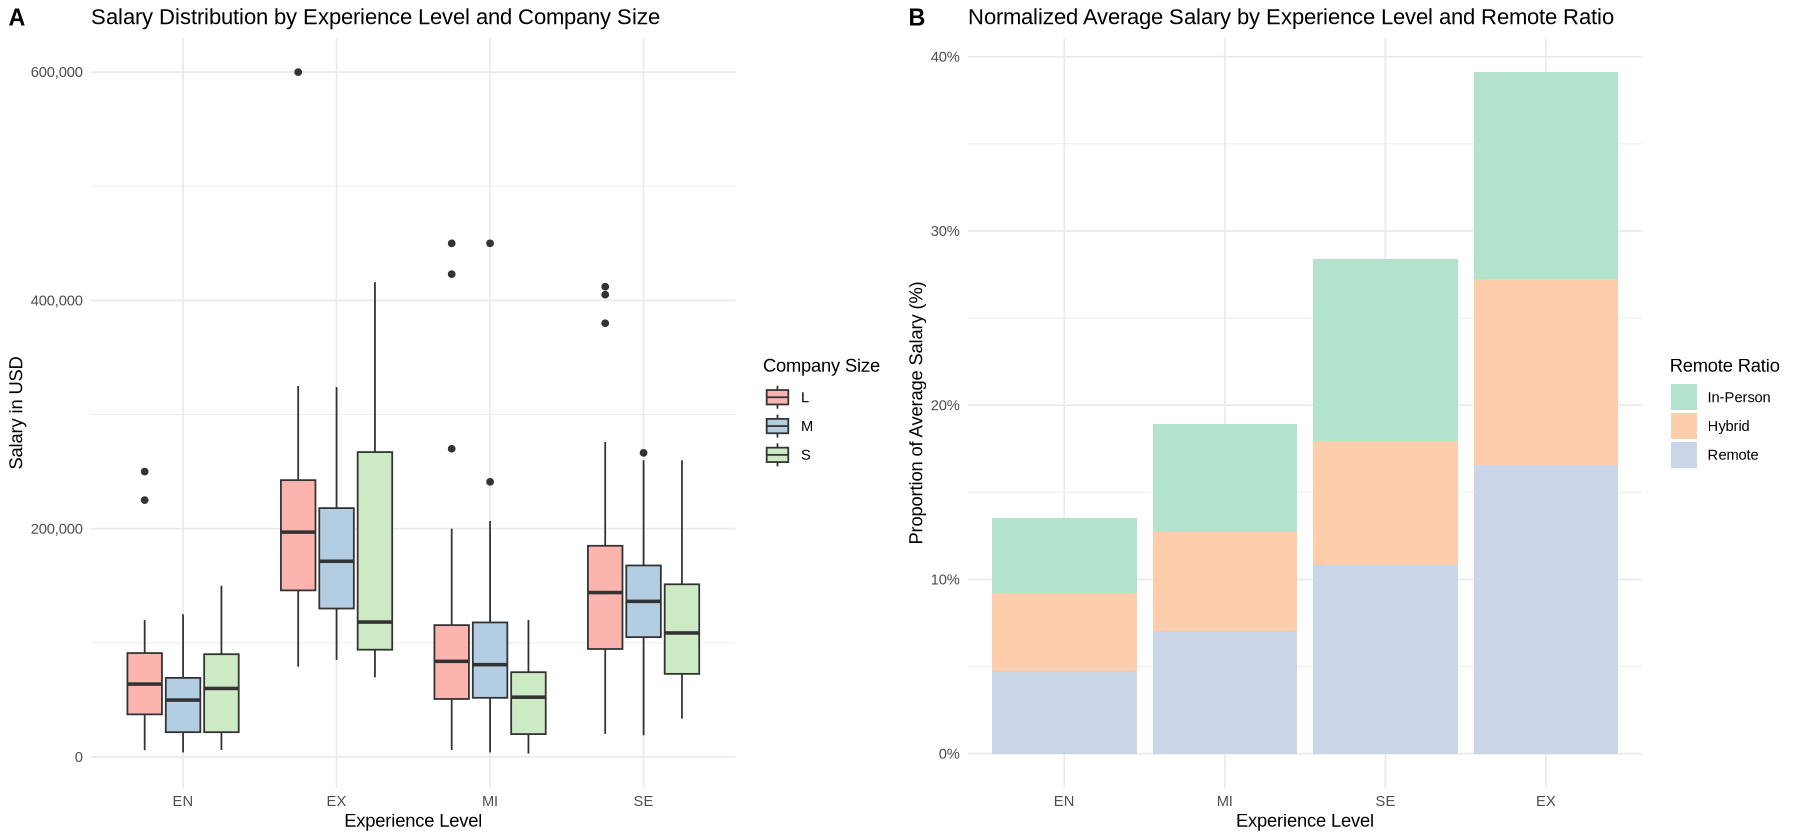

In [11]:
options(repr.plot.width = 15, repr.plot.height = 7) 

salary_boxplot <- ggplot(salary_data, aes(x = experience_level, y = salary_in_usd, fill = company_size)) +
      geom_boxplot() +
      scale_fill_brewer(palette = "Pastel1") +
      labs(title = "Salary Distribution by Experience Level and Company Size",
           x = "Experience Level",
           y = "Salary in USD",
           fill = "Company Size") +
           scale_y_continuous(labels = label_comma()) +
      theme_minimal()

# Convert columns to factors with appropriate levels
salary_data$experience_level <- factor(salary_data$experience_level, levels = c("EN", "MI", "SE", "EX"))
salary_data$company_size <- factor(salary_data$company_size, levels = c("S", "M", "L"))
salary_data$remote_ratio <- factor(salary_data$remote_ratio, levels = c("0", "50", "100"),
                                   labels = c("In-Person", "Hybrid", "Remote"))


salary_data <- salary_data %>%
  group_by(experience_level, remote_ratio) %>%
  summarise(mean_salary = mean(salary_in_usd, na.rm = TRUE), .groups = 'drop') %>%
  mutate(prop = mean_salary / sum(mean_salary))

plot1 <- ggplot(salary_data, aes(x = experience_level, y = prop, fill = remote_ratio)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = percent_format()) +
  labs(title = "Normalized Average Salary by Experience Level and Remote Ratio",
       x = "Experience Level", y = "Proportion of Average Salary (%)",
       fill = "Remote Ratio") +
  scale_fill_brewer(palette = "Pastel2") +
  theme_minimal() 

plot_grid(salary_boxplot, plot1, labels = "AUTO", ncol = 2)

- Based on the plots, we can derive some interesting insights:

    - Plot A presents a box-plot illustrating the distribution of salaries based on experience levels and the size of the company. There's a noticeable trend where median salaries increase with the level of experience, which aligns with the typical industry expectation. This increase is attributed to the enhanced skills and knowledge that come with more experience. Furthermore, it's observed that larger companies exhibit a broader salary range, especially for those in senior (SE) and executive (EX) positions, indicating a wider variety of roles and duties at these levels of experience. Additionally, the occurrence of outliers at the SE and EX levels in bigger companies points to some positions receiving significantly high salaries, likely reflecting the importance of certain roles and the exceptional performance of individuals in those roles.
    
    - Plot B represents a stacked bar chart representing the normalized average salaries by experience level and remote ratio. The proportion of salary related to remote work seems to increase with experience level. For executive-level positions (EX), the proportion of remote salaries is highest, suggesting that more experienced professionals might have greater flexibility or opportunities to work remotely. Entry-level positions (EN) have a notable proportion of in-person work, which might be due to the nature of these roles where on-site training and closer supervision are common

- In conclusion, predictor variables such as job_title, experience_level, company_size, work_year, and remote_ratio seem as essential input variables to predict the salaries of employees.